In [40]:
#remove movies with budget 0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import classes.database as db

db.connect()

df = pd.DataFrame()
df = db.getMovieData("movies_full")


df['budget'] = df['budget'].apply(lambda x: np.nan if x <= 50000 else x)


df = df.dropna(subset=['budget']).reset_index(drop=True)


db.shutdown()

Data downloaded
PostgreSQL connection is closed


In [41]:
df.head()
df.shape

(11919, 17)

In [42]:
#remove movies with less than 1000 votes

df = df.loc[df['vote_count'] >= 1000]




In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Text(0, 0.5, 'Number of Movies')

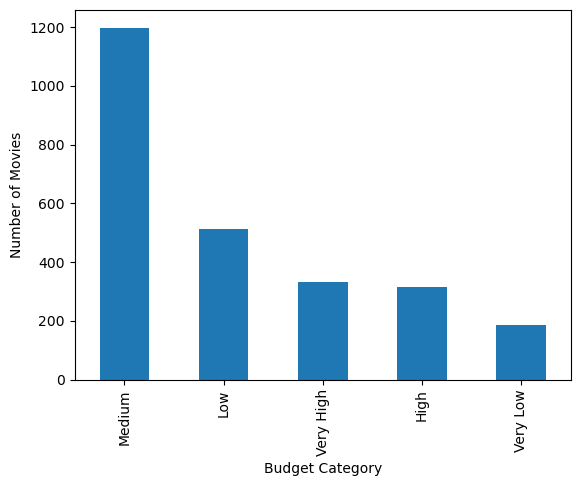

In [44]:
budget_ranges = [50000, 3000000, 15000000, 65000000, 100000000, float('inf')]
category_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['budget_category'] = pd.cut(df['budget'], bins=budget_ranges, labels=category_names, right=False)

df['budget_category'].value_counts().plot(kind='bar')

plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')




Text(0.5, 1.0, 'Budget vs Ratings')

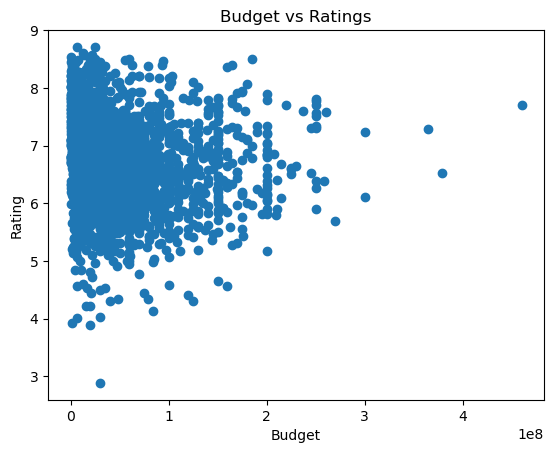

In [45]:
plt.scatter(df['budget'], df['vote_average'])

plt.xlabel('Budget')
plt.ylabel('Rating')
plt.title('Budget vs Ratings')


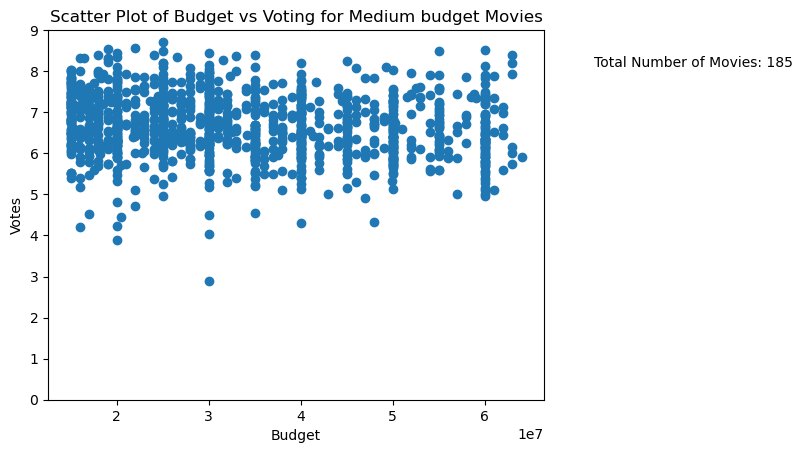

In [46]:
medium_budget_movies = df[df['budget_category'] == 'Medium']

plt.scatter(medium_budget_movies['budget'], medium_budget_movies['vote_average'])
plt.xlabel('Budget')
plt.ylabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for Medium budget Movies')

plt.ylim(0, 9)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes) 


plt.show()

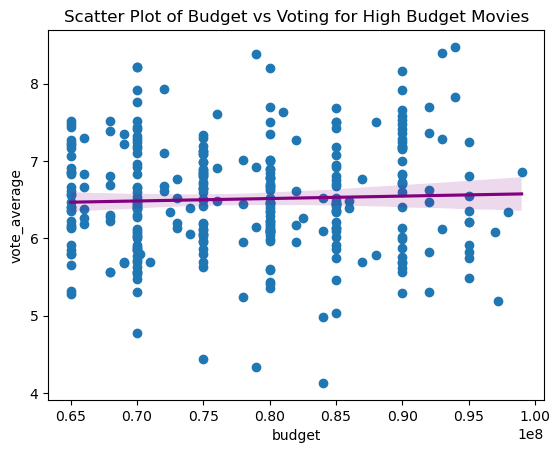

In [47]:
high_budget_movies = df[df['budget_category'] == 'High']

plt.scatter(high_budget_movies['budget'], high_budget_movies['vote_average'])
plt.xlabel('Budget')
plt.ylabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

total_movies = len(high_budget_movies)
#plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes) 

sns.regplot(x=high_budget_movies['budget'], y=high_budget_movies['vote_average'], scatter=False, color='purple')


plt.show()

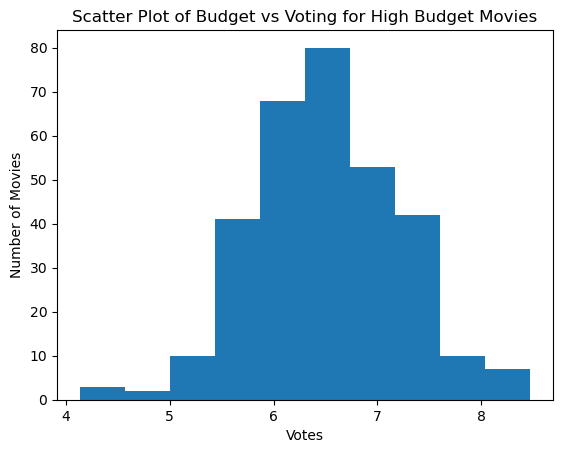

In [75]:
high_budget_movies = df[df['budget_category'] == 'High']

#plt.scatter(high_budget_movies['vote_average'], high_budget_movies['budget'])

#plt.hist(df ['vote_average'], bins=10)  
plt.hist(high_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

total_movies = len(high_budget_movies)
#plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes) 

#sns.regplot(x=high_budget_movies['vote_average'], y=high_budget_movies['budget'], scatter=False, color='purple')


plt.show()

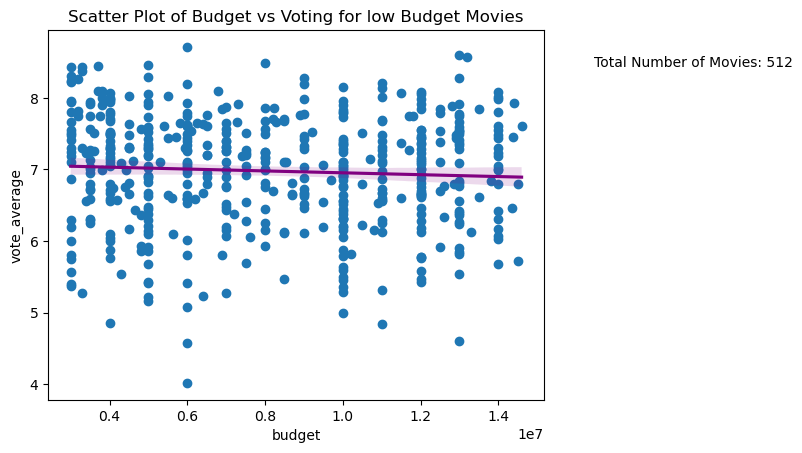

In [48]:
low_budget_movies = df[df['budget_category'] == 'Low']

plt.scatter(low_budget_movies['budget'], low_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Votes out of 10')
plt.title('Scatter Plot of Budget vs Voting for low Budget Movies')

total_movies = len(low_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)

sns.regplot(x=low_budget_movies['budget'], y=low_budget_movies['vote_average'], scatter=False, color='purple')
plt.show()

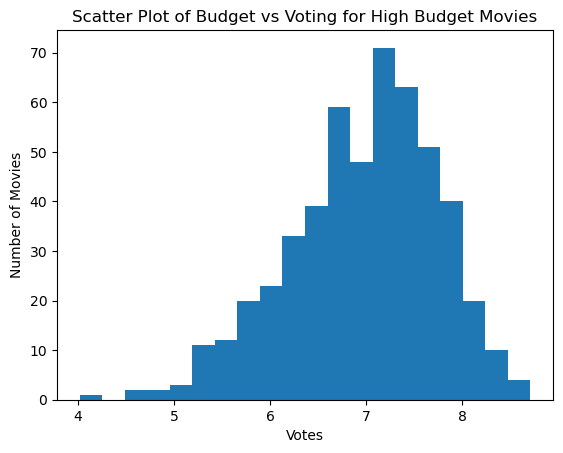

In [80]:
low_budget_movies = df[df['budget_category'] == 'Low']

#plt.scatter(high_budget_movies['vote_average'], high_budget_movies['budget'])

#plt.hist(df ['vote_average'], bins=10)  
plt.hist(low_budget_movies['vote_average'], bins=20)
plt.ylabel('Number of Movies')
plt.xlabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

total_movies = len(low_budget_movies)
#plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes) 

#sns.regplot(x=high_budget_movies['vote_average'], y=high_budget_movies['budget'], scatter=False, color='purple')


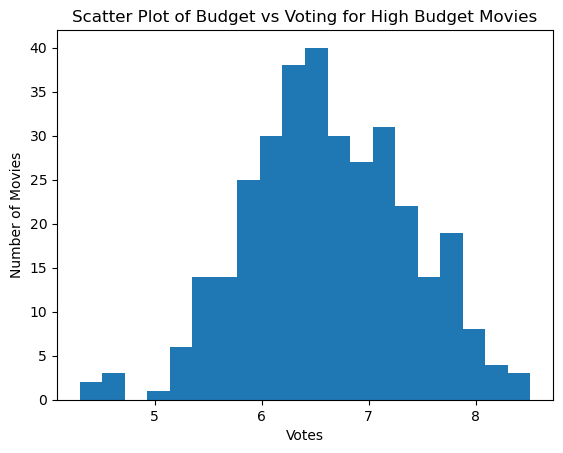

In [79]:
veryhigh_budget_movies = df[df['budget_category'] == 'Very High']

#plt.scatter(high_budget_movies['vote_average'], high_budget_movies['budget'])

plt.hist(veryhigh_budget_movies['vote_average'], bins=20)
plt.ylabel('Number of Movies')
plt.xlabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

total_movies = len(veryhigh_budget_movies)
#plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes) 

#sns.regplot(x=high_budget_movies['vote_average'], y=high_budget_movies['budget'], scatter=False, color='purple')


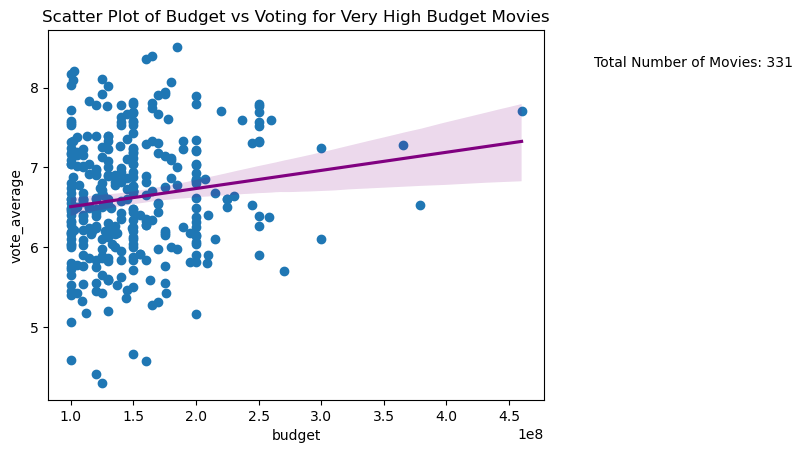

In [49]:
low_budget_movies = df[df['budget_category'] == 'Very High']

plt.scatter(low_budget_movies['budget'], low_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for Very High Budget Movies')

total_movies = len(low_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)

sns.regplot(x=low_budget_movies['budget'], y=low_budget_movies['vote_average'], scatter=False, color='purple')


plt.show()

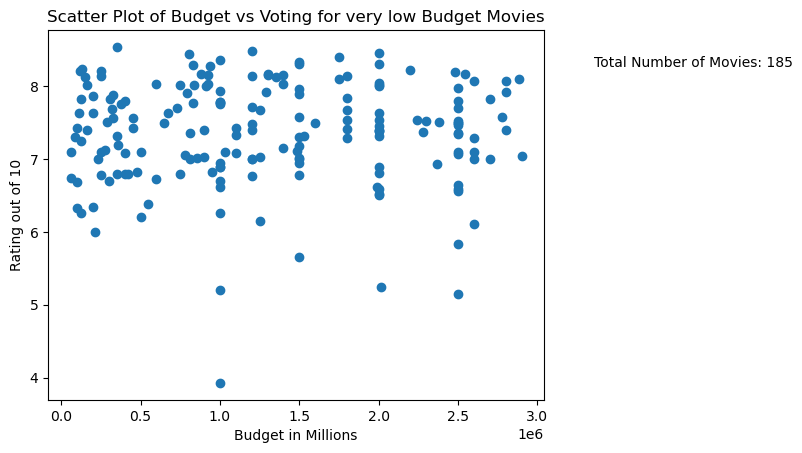

In [50]:
low_budget_movies = df[df['budget_category'] == 'Very Low']

plt.scatter(low_budget_movies['budget'], low_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating out of 10')
plt.title('Scatter Plot of Budget vs Voting for very low Budget Movies')

total_movies = len(low_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)

plt.show()



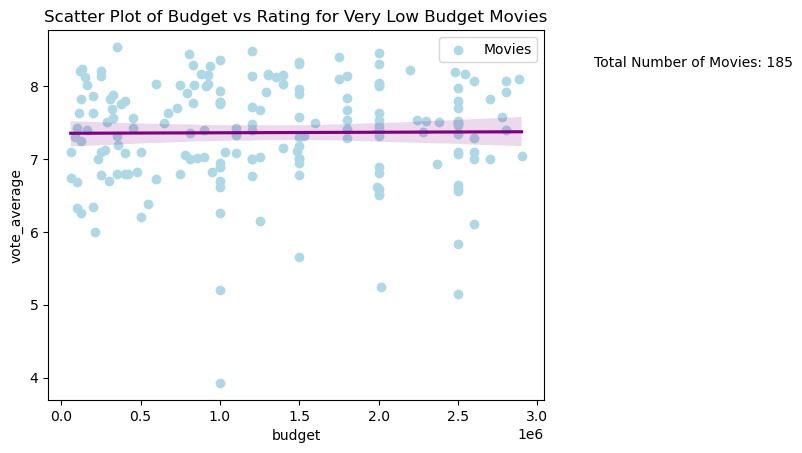

In [51]:

verylow_budget_movies = df[df['budget_category'] == 'Very Low']

plt.scatter(verylow_budget_movies['budget'], verylow_budget_movies['vote_average'], color='lightblue')
plt.xlabel('Budget')
plt.ylabel('Rating out of 10')
plt.title('Scatter Plot of Budget vs Rating for Very Low Budget Movies')

# Adjust x-axis range
#plt.xlim(10000, np.max(low_budget_movies['budget']))  # Adjust the limits as per your data range

total_movies = len(verylow_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)

plt.legend(['Movies'])

sns.regplot(x=verylow_budget_movies['budget'], y=verylow_budget_movies['vote_average'], scatter=False, color='purple')

plt.show()



